# Task 1: Domain Selection and Web Scraping

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install boilerpy3

In [3]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin
import requests
from bs4 import BeautifulSoup as bs
from boilerpy3 import extractors
import csv

In [3]:
domain = "https://www.wikipedia.org/wiki"
query = "Tourism_in_Telangana"
URL = f"{domain}/{query}"

response = requests.get(URL)
if response.status_code == 200:
    print("Successfully fetched webpage!")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)

Successfully fetched webpage!


In [4]:
# Create a BeautifulSoup object and extract specific content from the HTML page.
soup = bs(response.content, 'html.parser')
# Pretty print the HTML content
print(soup.body.prettify()) # soup.body.prettify() also works

<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Tourism_in_Telangana rootpage-Tourism_in_Telangana skin-vector-2022 action-view">
 <a class="mw-jump-link" href="#bodyContent">
  Jump to content
 </a>
 <div class="vector-header-container">
  <header class="vector-header mw-header">
   <div class="vector-header-start">
    <nav aria-label="Site" class="vector-main-menu-landmark">
     <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown" title="Main menu">
      <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
      <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weigh

In [5]:
links = soup.find_all("a")
links = [link['href'] for link in links if 'href' in link.attrs]
links

['#bodyContent',
 '/wiki/Main_Page',
 '/wiki/Wikipedia:Contents',
 '/wiki/Portal:Current_events',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:About',
 '//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 '/wiki/Help:Contents',
 '/wiki/Help:Introduction',
 '/wiki/Wikipedia:Community_portal',
 '/wiki/Special:RecentChanges',
 '/wiki/Wikipedia:File_upload_wizard',
 '/wiki/Main_Page',
 '/wiki/Special:Search',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 '/w/index.php?title=Special:CreateAccount&returnto=Tourism+in+Telangana',
 '/w/index.php?title=Special:UserLogin&returnto=Tourism+in+Telangana',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 '/w/index.php?title=Special:CreateAccount&returnto=Tourism+in+Telangana',
 '/w/index.php?title=Special:UserLogin&returnto=Tourism+in+Telangana',
 '/wiki/Help:Introduction',
 '/wiki/Special:MyContributions',
 '/wiki/Special:MyT

In [6]:
# Filter out links that are not in the 'en.wikipedia.org' domain and exclude certain domains
english_links = [link for link in links if "https://" not in link]
english_links = list(set(english_links))
english_links

['/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License',
 '#cite_note-21',
 '/wiki/List_of_tourist_attractions_in_Jaipur',
 '#cite_ref-19',
 '/wiki/Hyderabad_City_Police',
 '/wiki/Asia',
 '/wiki/Kancherla_Gopanna',
 '/wiki/List_of_tourist_attractions_in_Ahmedabad',
 '/wiki/History_of_India',
 '/wiki/List_of_tourist_attractions_in_Jabalpur',
 '/wiki/Main_Page',
 '/wiki/Odisha_Tourism_Development_Corporation',
 '/wiki/List_of_bridges_in_India',
 '/wiki/Mulugu_district',
 '/wiki/List_of_archaeoastronomical_sites_by_country#India',
 '/wiki/Kakatiya_Dynasty',
 '/wiki/Jagtial_district',
 '#cite_note-4',
 '#bodyContent',
 'http://businesstoday.intoday.in/story/telangana-government-launches-its-own-logo/1/206771.html',
 'http://telanganatourisminfo.com/bhadrachalam-temple-history//',
 '/wiki/Architecture_of_Telangana',
 '/wiki/Sarva_Dharma_Sama_Bhava',
 'http://www.britannica.com/EBchecked/topic/371808/Mecca-Mosque',
 '/wiki/Category:Waterfalls_of_Telan

In [7]:
links = [urljoin(domain, link) for link in english_links]
links

['https://www.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License',
 'https://www.wikipedia.org/wiki#cite_note-21',
 'https://www.wikipedia.org/wiki/List_of_tourist_attractions_in_Jaipur',
 'https://www.wikipedia.org/wiki#cite_ref-19',
 'https://www.wikipedia.org/wiki/Hyderabad_City_Police',
 'https://www.wikipedia.org/wiki/Asia',
 'https://www.wikipedia.org/wiki/Kancherla_Gopanna',
 'https://www.wikipedia.org/wiki/List_of_tourist_attractions_in_Ahmedabad',
 'https://www.wikipedia.org/wiki/History_of_India',
 'https://www.wikipedia.org/wiki/List_of_tourist_attractions_in_Jabalpur',
 'https://www.wikipedia.org/wiki/Main_Page',
 'https://www.wikipedia.org/wiki/Odisha_Tourism_Development_Corporation',
 'https://www.wikipedia.org/wiki/List_of_bridges_in_India',
 'https://www.wikipedia.org/wiki/Mulugu_district',
 'https://www.wikipedia.org/wiki/List_of_archaeoastronomical_sites_by_country#India',
 'https://www.wikipedia.org/wiki/Kakatiy

In [8]:
print("Total number of documents collected : ",len(links))

Total number of documents collected :  479


In [11]:
# List to store scraped data
data = []

# BoilerPy3 extractor for main content
extractor = extractors.ArticleExtractor()

for link in links:
    try:
        # Send a GET request to the URL
        response = requests.get(link, timeout=10)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Extract title using BeautifulSoup
        soup = bs(response.content, 'html.parser')
        title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"

        # Extract main content using BoilerPy3
        main_content = extractor.get_content(response.text)

        # Append extracted data to the list
        data.append([title, link, main_content])
        print(f"Scraped: {title} | URL: {link}")
    except Exception as e:
        print(f"Error scraping {link}: {e}")


Scraped: Wikipedia:Text of the Creative Commons Attribution-ShareAlike 4.0 International License - Wikipedia | URL: https://www.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License
Scraped: Wikipedia, the free encyclopedia | URL: https://www.wikipedia.org/wiki#cite_note-21
Scraped: List of tourist attractions in Jaipur - Wikipedia | URL: https://www.wikipedia.org/wiki/List_of_tourist_attractions_in_Jaipur
Scraped: Wikipedia, the free encyclopedia | URL: https://www.wikipedia.org/wiki#cite_ref-19
Scraped: Hyderabad City Police - Wikipedia | URL: https://www.wikipedia.org/wiki/Hyderabad_City_Police
Scraped: Asia - Wikipedia | URL: https://www.wikipedia.org/wiki/Asia
Scraped: Bhadrachala Ramadasu - Wikipedia | URL: https://www.wikipedia.org/wiki/Kancherla_Gopanna
Scraped: Ahmedabad - Wikipedia | URL: https://www.wikipedia.org/wiki/List_of_tourist_attractions_in_Ahmedabad
Scraped: History of India - Wikipedia | URL: https://www.wikipedi

Scraped: Charminar, Kakatiya arch in ‘T’ logo - The Hindu | URL: http://www.thehindu.com/news/national/telangana/charminar-kakatiya-arch-in-t-logo/article6062828.ece
Error scraping http://stjohnschurchcsi.org/MedakDio.aspx: 404 Client Error: Not Found for url: http://stjohnschurchcsi.org/MedakDio.aspx
Scraped: List of World Heritage Sites in India - Wikipedia | URL: https://www.wikipedia.org/wiki/List_of_World_Heritage_Sites_in_India
Scraped: Wikipedia, the free encyclopedia | URL: https://www.wikipedia.org/wiki#cite_note-19
Scraped: Varni - Wikipedia | URL: https://www.wikipedia.org/wiki/Varni
Scraped: Wikipedia, the free encyclopedia | URL: https://www.wikipedia.org/wiki#cite_ref-16
Scraped: Tourism in Telangana - Wikipedia | URL: https://www.wikipedia.org/w/index.php?title=Tourism_in_Telangana&printable=yes
Scraped: Bhadrachalam - Wikipedia | URL: https://www.wikipedia.org/wiki/Bhadrachalam
Scraped: Cave paintings in India - Wikipedia | URL: https://www.wikipedia.org/wiki/Cave_paint

In [12]:
# Save the data to a CSV file
with open("NLP_data.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Title", "URL", "Content"])
    # Write the data
    writer.writerows(data)
print("Data saved to scraped_data.csv")

Data saved to scraped_data.csv


In [15]:
# A sample document
for i in range(3):
  print(data[6][i])

Bhadrachala Ramadasu - Wikipedia
https://www.wikipedia.org/wiki/Kancherla_Gopanna
17th century Indian composer and poet
Bhadrachala Ramadasu
A statue of Bhakta Ramadasu singing a song in Rama's praise
Background information
bhadrachalaramadasu.com
Musical artist
Kancharla Gopanna ( Telugu : కంచర్ల గోపన్న)  ( c. 1620 – 1688), popularly known as Bhakta Ramadasu or Bhadrachala Ramadasu ( Telugu : భద్రాచల రామదాసు), was a 17th-century devotee of the Hindu god Rama , a saint-poet and a composer of Carnatic music . He is a famous Vaggeyakara (classical composer) [a] from the Telugu classical era. He was born in the village of Nelakondapalli in Khammam district , and orphaned as a teenager. He spent his later years in Bhadrachalam and 12 years in solitary confinement at the Golconda prison during the Qutb Shahi rule. Different mythical stories about his life circulate in the Telugu tradition. He is renowned for constructing the famous Sita Ramachandraswamy Temple and pilgrimage center on the b

# Task 2: Data Cleaning and Pre-processing

In [16]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 5.2 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 6.1 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 7.4 MB/s eta 0:00:02
     --------------------------- ------------ 8.7/12.8 MB 9.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 5.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now lo

In [1]:
import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("NLP_data.csv", encoding="utf-8")

# Print the first few rows of the DataFrame
# print(df.head())

# Access specific columns (optional)
titles = df["Title"]
urls = df["URL"]
contents = df["Content"]

# Example: Print titles
# print("Titles:", titles.tolist())
print("titles count : ",len(titles))
print("urls count : ",len(urls))
print("contents count : ",len(contents))

titles count :  470
urls count :  470
contents count :  470


In [3]:
# Download the stopwords dataset
nltk.download('stopwords')

# Define the stop words set
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)  # Convert non-strings to strings if needed

    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words and convert to lowercase
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(words)

# Clean each document in the dataset
for i in range(len(contents)):
    contents[i] = clean_text(contents[i])  # Clean the text in each document (string)

# Print cleaned text for the first document
print("Title:", titles[6])
print("URL:", urls[6])
print("Cleaned Text:", contents[6][:500])  # Displaying only the first 500 characters

Title: Bhadrachala Ramadasu - Wikipedia
URL: https://www.wikipedia.org/wiki/Kancherla_Gopanna
Cleaned Text: th century indian composer poet bhadrachala ramadasu statue bhakta ramadasu singing song ramas praise background information bhadrachalaramadasucom musical artist kancharla gopanna telugu c popularly known bhakta ramadasu bhadrachala ramadasu telugu thcentury devotee hindu god rama saintpoet composer carnatic music famous vaggeyakara classical composer telugu classical era born village nelakondapalli khammam district orphaned teenager spent later years bhadrachalam years solitary confinement gol


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sai_kiran_kocherla\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Tokenization function
def tokenize_text_spacy(text):
    doc = nlp(text)

    # Sentence Tokenization
    sentences = [sent.text for sent in doc.sents]

    # Word Tokenization
    words = [token.text for token in doc]

    return sentences, words

# Apply tokenization to each document
for i in range(len(contents)):
    # Check if content is a string and tokenize
    if isinstance(contents[i], str):  # Ensure the content is a string
        sentences, words = tokenize_text_spacy(contents[i])  # Tokenize the cleaned text
        # Store the sentences and words in a dictionary
        contents[i] = {'sentences': sentences, 'words': words}

# Print tokenized output for the first document
print("Title:", titles[6])  # Assuming titles is a list containing the document titles
print("URL:", urls[6])      # Assuming urls is a list containing the document URLs
print("Sentences:", contents[6]['sentences'][:3])  # Displaying the first 3 sentences
print("Words:", contents[6]['words'][:20])  # Displaying the first 20 words

Title: Bhadrachala Ramadasu - Wikipedia
URL: https://www.wikipedia.org/wiki/Kancherla_Gopanna
Sentences: ['th century indian composer poet bhadrachala ramadasu statue bhakta ramadasu singing song ramas praise background information bhadrachalaramadasucom musical artist kancharla gopanna telugu c popularly known bhakta ramadasu bhadrachala ramadasu telugu thcentury devotee hindu god rama saintpoet composer carnatic music famous vaggeyakara classical composer telugu classical era born village nelakondapalli khammam district orphaned teenager spent later years bhadrachalam years solitary confinement golconda prison qutb shahi rule different mythical stories life circulate telugu tradition renowned constructing famous sita ramachandraswamy temple pilgrimage center banks river godavari bhadrachalam devotional kirtana lyrics rama illustrate classical pallavi anupallavi charanam genre composed mostly telugu sanskrit occasional use tamil language famous south indian classical music ramadaasu k

In [5]:
################### Approach 1 : Stemming ###################
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
# Stemming function
def apply_stemming(words):
    return [stemmer.stem(word) for word in words]
# Apply stemming to each document
for i in range(len(contents)):
    # Ensure we are working with the 'words' key in the dictionary
    if 'words' in contents[i]:  # Check if the 'words' key exists
        words = contents[i]['words']  # Get the list of words
        stemmed_words  = apply_stemming(words)  # Apply stemming
        contents[i]['stemmed_words'] = stemmed_words   # Store the stemmed words in the dictionary
# Print the stemmed words for the first document
print("Title:", titles[0])
print("Stemmed Words:", contents[3]['stemmed_words'][:20])  # Displaying the first 20 stemmed words

Title: Wikipedia:Text of the Creative Commons Attribution-ShareAlike 4.0 International License - Wikipedia
Stemmed Words: ['featur', 'list', 'today', 'featur', 'pictur', 'chartr', 'cathedr', 'also', 'known', 'cathedr', 'ladi', 'chartr', 'cathol', 'cathedr', 'chartr', 'franc', 'kilometr', 'mile', 'southwest', 'pari']


In [27]:
####################### Approach 2 : Lemmatization #######################
# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Lemmatization function
def apply_lemmatization(words):
    return [token.lemma_ for token in nlp(" ".join(words))]  # Use spaCy's lemmatizer

# Apply lemmatization to each document
for i in range(len(contents)):
    # Ensure we are working with the 'words' key in the dictionary
    if 'words' in contents[i]:  # Check if the 'words' key exists
        words = contents[i]['words']  # Get the list of words
        lemmatized_words  = apply_lemmatization(words)  # Apply stemming
        contents[i]['lemmatized_words'] = lemmatized_words   # Store the stemmed words in the dictionary

# Print the lemmatized words for the first document
print("Title:", titles[0])  # Assuming title is stored in contents[0][0]
print("Lemmatized Words:", contents[3]['lemmatized_words'][:20])  # Displaying the first 20 lemmatized words

Title: Wikipedia:Text of the Creative Commons Attribution-ShareAlike 4.0 International License - Wikipedia
Lemmatized Words: ['feature', 'list', 'today', 'feature', 'picture', 'chartre', 'cathedral', 'also', 'know', 'cathedral', 'lady', 'chartre', 'catholic', 'cathedral', 'chartre', 'france', 'kilometre', 'mile', 'southwest', 'paris']


We preffered lemmatization over stemming as in Natural language processing tasks,lemmatization gives more accuracy because of its characteristics and through stemming execution will be faster and get approximate results.

# Task 3: Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [29]:
# Creation of lists to flatten all the cleaned words into one list for analysis
all_words = []
sentence_lengths = []

# Loop to analyze words and sentence lengths
for i in range(len(contents)):
    # Ensure the document contains 'words' and 'sentences' keys
    if 'words' in contents[i] and 'sentences' in contents[i]:
        # Extend the all_words list with pre-extracted words
        all_words.extend(contents[i]['words'])
        # Calculate sentence lengths using pre-extracted sentences
        sentence_lengths.extend([len(sentence.split()) for sentence in contents[i]['sentences']])
# Step 1: Word Frequency Analysis
word_counts = Counter(all_words)

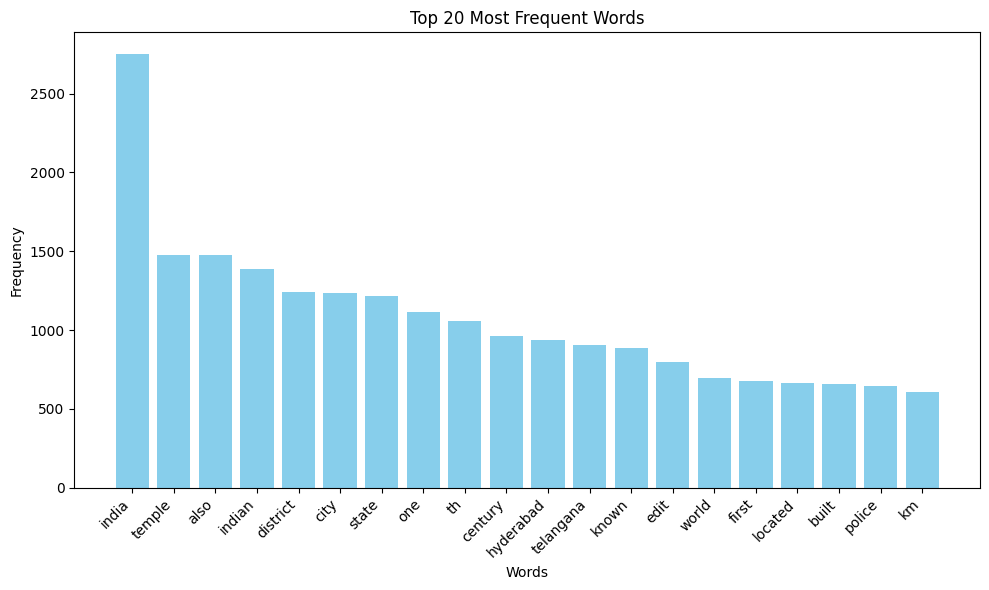

In [ ]:
# Get the most common words
most_common_words = word_counts.most_common(20)  # Top 20 most common words
# Step 2: Visualization - Bar chart of word frequencies
word_labels, word_freqs = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(word_labels, word_freqs, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

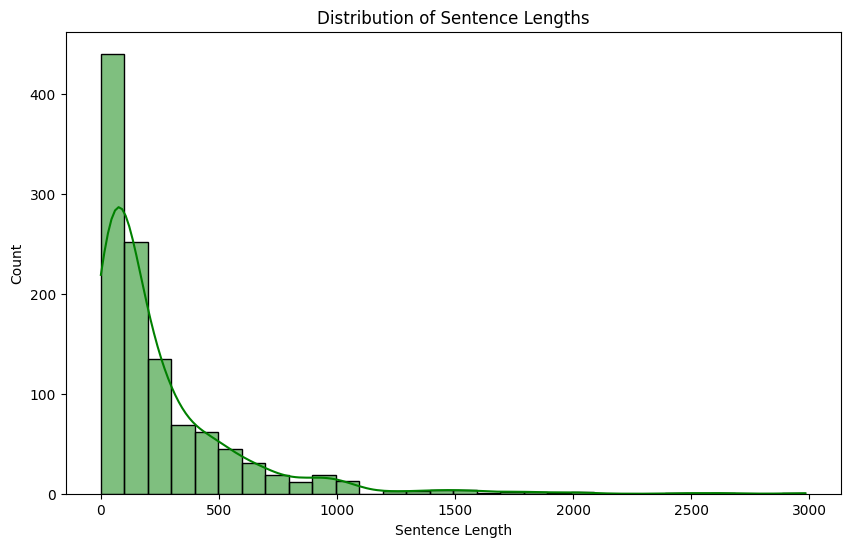

In [31]:

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, kde=True, color='green', bins=30)
plt.xlabel('Sentence Length')
plt.title('Distribution of Sentence Lengths')
plt.show()

In [32]:

# Step 4: Additional Statistics
# Average word length
avg_word_length = np.mean([len(word) for word in all_words])
print(f'Average Word Length: {avg_word_length:.2f}')

# Number of unique words
unique_words = len(set(all_words))
print(f'Number of Unique Words: {unique_words}')

# Lexical Diversity
lexical_diversity = unique_words / len(all_words) if len(all_words) > 0 else 0
print(f'Lexical Diversity: {lexical_diversity:.4f}')

# Optional: Show some other interesting statistics
# Most frequent word length
most_frequent_word_length = Counter([len(word) for word in all_words]).most_common(1)[0]
print(f'Most Frequent Word Length: {most_frequent_word_length[0]} (appears {most_frequent_word_length[1]} times)')

# Total number of words in dataset
total_words = len(all_words)
print(f'Total Number of Words: {total_words}')

Average Word Length: 6.75
Number of Unique Words: 32000
Lexical Diversity: 0.1143
Most Frequent Word Length: 5 (appears 45055 times)
Total Number of Words: 279959
